In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Load a special tool for splitting the dataset:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
# Set the RANDOM_SEED
RANDOM_SEED = 42


In [3]:
# Load data from the competition

DATA_DIR = 'data/'
df_train = pd.read_csv(DATA_DIR + 'hotels_train.csv') # training dataset
df_test = pd.read_csv(DATA_DIR + 'hotels_test.csv') # dataset for prediction
sample_submission = pd.read_csv(DATA_DIR + 'submission.csv') # submission file


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [5]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [7]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [8]:
# Mark where we have train and test data
df_train['sample'] = 1
df_test['sample'] = 0

# In the test dataset, we don't have the reviewer_score value; we need to predict it, so for now, we just fill it with zeros
df_test['reviewer_score'] = 0

# Combine the train and test datasets into one dataset
data = pd.concat([df_test, df_train], sort=False).reset_index(drop=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [10]:
data['lat'] = data['lat'].fillna(0).infer_objects(copy=False)
data['lng'] = data['lng'].fillna(0).infer_objects(copy=False)

In [11]:
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1473
lng                                             1473
sample                                             2
reviewer_score                                    38
dtype: int64

## Creating New Features


In [12]:
# Review date transformation
data['review_date'] = pd.to_datetime(data['review_date'])
data['review_day'] = data['review_date'].dt.day
data['review_month'] = data['review_date'].dt.month
data['review_year'] = data['review_date'].dt.year
data['review_day_of_week'] = data['review_date'].dt.dayofweek


In [13]:
import re
# Extracting the number of nights from tags
def extract_nights(tags):
    tags_list = eval(tags)  # Convert the string representation of a list into an actual list
    for tag in tags_list:
        match = re.search(r'Stayed (\d+) night', tag)
        if match:
            return int(match.group(1))
    return 0

data['nights_stayed'] = data['tags'].apply(extract_nights)


In [14]:
# Generate a list of the top 10 tags
from collections import Counter

# Ensure that the 'tags' column is treated as a list
data['tags'] = data['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Unpack the list of tags and count their frequency
tag_counts = Counter(tag.strip() for tags_list in data['tags'] for tag in tags_list)

# Get the top 10 most common tags
top_10_tags = tag_counts.most_common(10)

# Extract the names of the tags from the top 10
tags_to_extract = [tag for tag, count in top_10_tags]


In [15]:
# Convert tags to column names in lowercase with underscores
def tag_to_column_name(tag):
  return tag.lower().replace(" ", "_")

# Function to extract binary features
def extract_tags(tag_list, tags_to_extract):
  binary_features = {}
  for tag in tags_to_extract:
    binary_features[tag_to_column_name(tag)] = 1 if tag in tag_list else 0
  return binary_features

# Create new binary features
tag_features = data['tags'].apply(lambda x: extract_tags(x, tags_to_extract))
tag_features_df = pd.DataFrame(tag_features.tolist())

# Merge with the main dataset
data = pd.concat([data.reset_index(drop=True), tag_features_df.reset_index(drop=True)], axis=1)


### Checking Correlations

Since there are too many features, a heatmap would be unreadable. Let's create a table instead.


In [16]:
# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Unstack the correlation matrix to get a Series
correlation_series = correlation_matrix.unstack()

# Convert the Series into a DataFrame
correlation_df = pd.DataFrame(correlation_series, columns=['correlation'])

# Reset the index to get a DataFrame with columns for feature pairs
correlation_df.reset_index(inplace=True)

# Rename the columns for clarity
correlation_df.columns = ['feature1', 'feature2', 'correlation']

# Filter out self-correlations (correlations of a feature with itself)
correlation_df = correlation_df[correlation_df['feature1'] != correlation_df['feature2']]

# Remove duplicates to avoid redundant pairs
correlation_df['pair'] = list(zip(correlation_df.feature1, correlation_df.feature2))
correlation_df['pair'] = correlation_df['pair'].apply(sorted)
correlation_df['pair'] = correlation_df['pair'].astype(str)
correlation_df = correlation_df.drop_duplicates(subset=['pair'])

# Sort the DataFrame by correlation values in descending order
correlation_df = correlation_df.sort_values(by='correlation', ascending=False)

# Reset the index for better readability
correlation_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
correlation_df.head(20)  # Display the top 20 most correlated pairs


,feature1,feature2,correlation,pair
0,sample,reviewer_score,0.931753,"['reviewer_score', 'sample']"
1,additional_number_of_scoring,total_number_of_reviews,0.824884,"['additional_number_of_scoring', 'total_number..."
2,additional_number_of_scoring,lat,0.260190,"['additional_number_of_scoring', 'lat']"
3,review_total_negative_word_counts,review_total_positive_word_counts,0.119613,"['review_total_negative_word_counts', 'review_..."
4,average_score,reviewer_score,0.113643,"['average_score', 'reviewer_score']"
5,total_number_of_reviews_reviewer_has_given,lng,0.109449,"['lng', 'total_number_of_reviews_reviewer_has_..."
6,average_score,review_total_positive_word_counts,0.106719,"['average_score', 'review_total_positive_word_..."
7,average_score,lng,0.106323,"['average_score', 'lng']"
8,lng,nights_stayed,0.105098,"['lng', 'nights_stayed']"
9,total_number_of_reviews,lat,0.081479,"['lat', 'total_number_of_reviews']"


/var/folders/dl/7gg59dmd491c8_bgddzqs7p40000gq/T/ipykernel_22693/3525156694.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_no_sample[col], ax=ax, label=col, common_norm=False)
/var/folders/dl/7gg59dmd491c8_bgddzqs7p40000gq/T/ipykernel_22693/3525156694.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_no_sample[col], ax=ax, label=col, common_norm=False)
/var/folders/dl/7gg59dmd491c8_bgddzqs7p40000gq/T/ipykernel_22693/3525156694.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_no_sample[col], ax=ax, label=col, common_norm=False)
/var/folders/dl/7gg59dmd491c8_bgddzqs7p40000gq/T/ipykernel_22693/3525156694.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable th

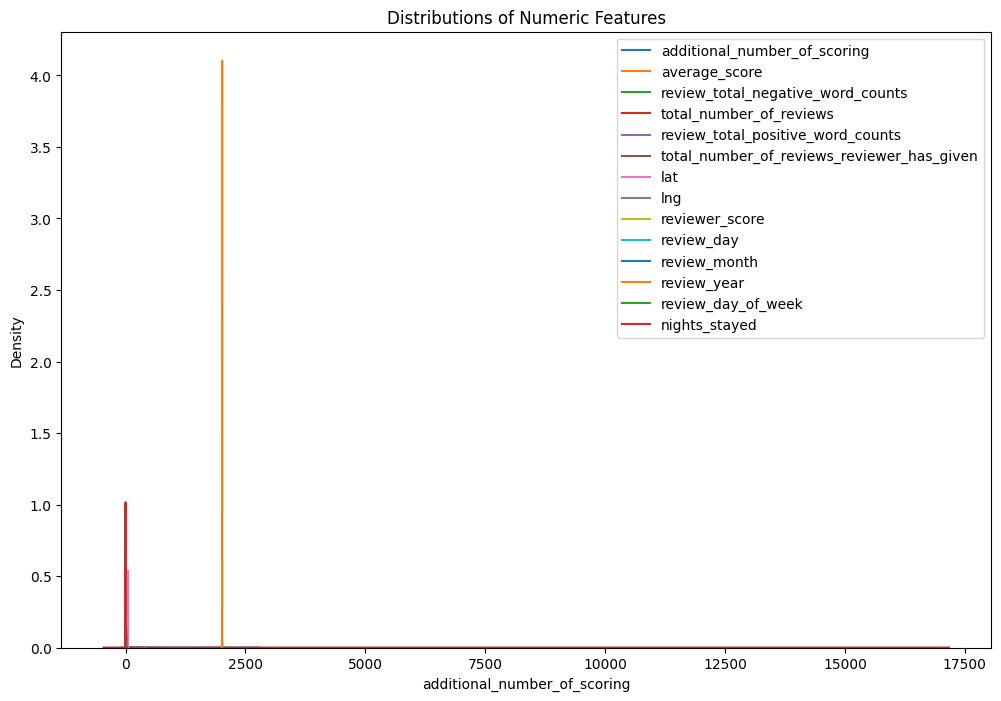

In [17]:
# Removing the 'sample' feature from the dataset
data_no_sample = data.drop('sample', axis=1)

# Selecting only numeric features from the dataset
numeric_columns = data_no_sample.select_dtypes(include=[np.number]).columns

# Creating the figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Distributions of Numeric Features')

# Plotting the distribution graphs for each numeric feature
for col in numeric_columns:
  sns.kdeplot(data_no_sample[col], ax=ax, label=col, common_norm=False)

# Displaying the legend
plt.legend()
plt.show()


In [18]:
from sklearn.preprocessing import RobustScaler

# Select only numeric columns from our DataFrame
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop(['sample', 'reviewer_score'])

# Initialize the RobustScaler
r_scaler = RobustScaler()

# Apply the scaler to the numeric columns
df_r = r_scaler.fit_transform(data[numeric_columns])

# Convert the result back into a DataFrame
df_r = pd.DataFrame(df_r, columns=numeric_columns)

# Replace the numeric columns in the original DataFrame with the scaled data
data[numeric_columns] = df_r


Checking features after normalization


/var/folders/dl/7gg59dmd491c8_bgddzqs7p40000gq/T/ipykernel_22693/974068034.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_no_sample[col], ax=ax, label=col, common_norm=False)
/var/folders/dl/7gg59dmd491c8_bgddzqs7p40000gq/T/ipykernel_22693/974068034.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_no_sample[col], ax=ax, label=col, common_norm=False)
/var/folders/dl/7gg59dmd491c8_bgddzqs7p40000gq/T/ipykernel_22693/974068034.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data_no_sample[col], ax=ax, label=col, common_norm=False)
/var/folders/dl/7gg59dmd491c8_bgddzqs7p40000gq/T/ipykernel_22693/974068034.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this w

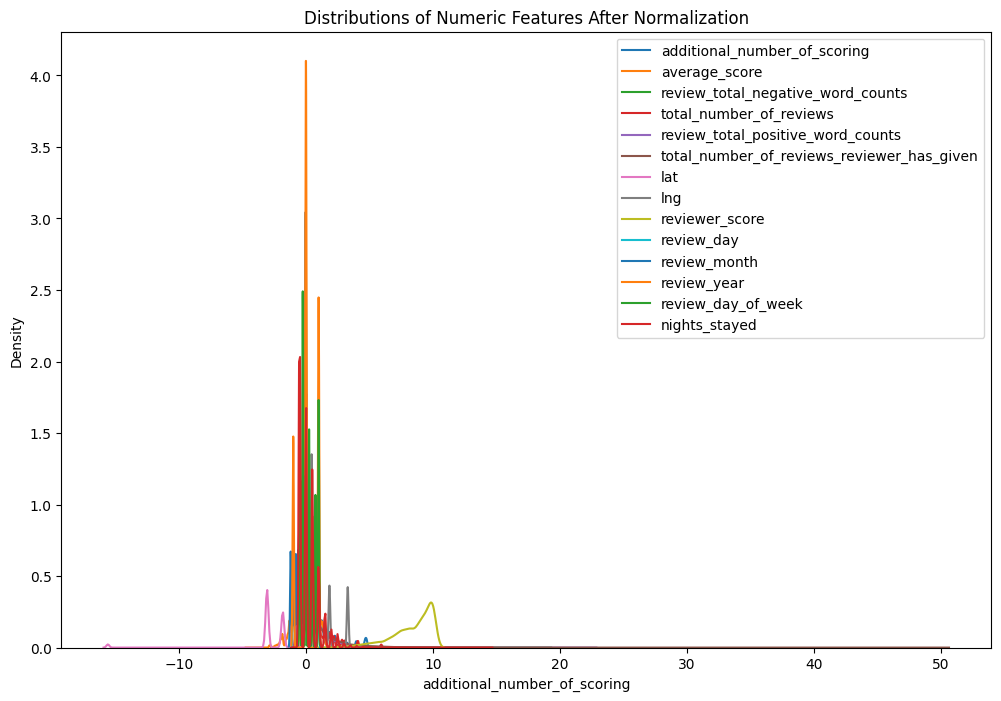

In [19]:
# Removing the 'sample' feature from the dataset
data_no_sample = data.drop('sample', axis=1)

# Selecting only numeric features from the dataset
numeric_columns = data_no_sample.select_dtypes(include=[np.number]).columns

# Creating the figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Distributions of Numeric Features After Normalization')

# Plotting the distribution graphs for each numeric feature
for col in numeric_columns:
  sns.kdeplot(data_no_sample[col], ax=ax, label=col, common_norm=False)

# Displaying the legend
plt.legend()
plt.show()


## Cleaning data

In [20]:
data = data.drop('additional_number_of_scoring', axis=1)
data = data.drop('review_date', axis=1)

In [21]:
# Removing all features that are not numeric
data = data.select_dtypes(include=[np.number])

# Checking the remaining features
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515738 non-null  float64
 1   review_total_negative_word_counts           515738 non-null  float64
 2   total_number_of_reviews                     515738 non-null  float64
 3   review_total_positive_word_counts           515738 non-null  float64
 4   total_number_of_reviews_reviewer_has_given  515738 non-null  float64
 5   lat                                         515738 non-null  float64
 6   lng                                         515738 non-null  float64
 7   sample                                      515738 non-null  int64  
 8   reviewer_score                              515738 non-null  float64
 9   review_day                                  515738 non-null  float64
 

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,sample,reviewer_score,review_day,...,leisure_trip,submitted_from_a_mobile_device,couple,stayed_1_night,stayed_2_nights,solo_traveler,stayed_3_nights,business_trip,group,family_with_young_children
0,-0.428571,2.047619,5.928222,3.000000,-0.285714,-1.806256,1.843634,0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.285714,0.047619,1.176183,-0.647059,0.571429,0.268106,0.971851,0,0.0,-0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.142857,-0.285714,-0.727162,-0.352941,1.714286,-3.059482,0.434523,0,0.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,-0.428571,-0.241028,0.941176,0.857143,-1.822376,1.848699,0,0.0,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,-0.428571,1.041191,-0.235294,-0.142857,0.263533,0.982747,0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training the Model on Prepared Data


In [22]:
# Now let's separate the test portion
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values  # our target
X = train_data.drop(['reviewer_score'], axis=1)

In [23]:
# Use the special train_test_split function to split the test data
# allocate 20% of the data for validation (parameter test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)


In [24]:
# checking the shapes of the data
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 23), (386803, 23), (386803, 22), (309442, 22), (77361, 22))

In [25]:
# Import the necessary libraries:
from sklearn.ensemble import RandomForestRegressor # tool for creating and training the model
from sklearn import metrics # tools for evaluating the model's accuracy


In [26]:
# Create the model
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)


In [27]:
# Train the model on the training dataset
model.fit(X_train, y_train)

# Use the trained model to predict hotel ratings in the test set.
# Store the predicted values in the variable y_pred
y_pred = model.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   20.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.6s finished


In [28]:
# Compare the predicted values (y_pred) with the actual values (y_test) to see how much they differ on average
# The metric is called Mean Absolute Error (MAE) and shows the average deviation of predicted values from actual ones.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


MAE: 0.9525188426738953


<Axes: >

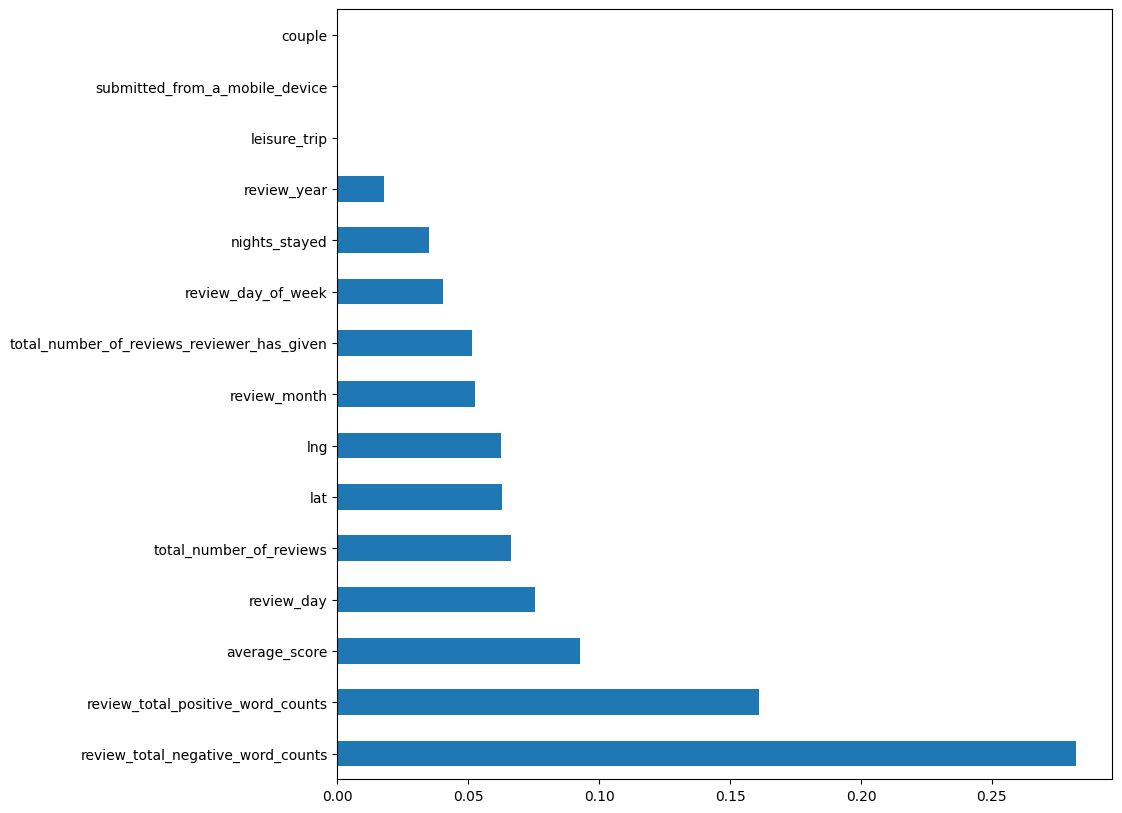

In [29]:
# Display the most important features for the model
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')


In [30]:
test_data.sample(10)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,reviewer_score,review_day,review_month,...,leisure_trip,submitted_from_a_mobile_device,couple,stayed_1_night,stayed_2_nights,solo_traveler,stayed_3_nights,business_trip,group,family_with_young_children
113375,0.857143,-0.428571,-0.521615,0.176471,1.857143,-0.800597,0.468510,0.0,0.933333,-1.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118578,-0.285714,-0.428571,0.707993,-0.176471,5.142857,-3.062221,0.434557,0.0,-1.000000,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71737,1.000000,-0.428571,1.088091,0.176471,-0.142857,0.008435,-0.017881,0.0,-0.333333,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115386,-0.142857,0.000000,0.179038,-0.352941,4.000000,-3.054937,0.444763,0.0,-1.000000,-0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36469,1.428571,0.333333,0.844209,0.294118,-0.142857,0.000743,-0.000050,0.0,0.066667,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11175,-0.428571,-0.428571,-0.176998,2.235294,0.285714,-1.823223,1.850533,0.0,-0.266667,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20333,0.142857,0.571429,0.590946,-0.294118,0.000000,-0.803589,0.477499,0.0,-0.866667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94029,0.428571,0.571429,0.143148,0.352941,1.000000,-0.001849,-0.036687,0.0,-0.266667,-0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111391,-0.428571,-0.428571,-0.342577,0.470588,-0.285714,0.008862,-0.033844,0.0,-0.933333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56525,1.000000,-0.238095,-0.241028,-0.294118,0.571429,-1.822376,1.848699,0.0,-0.600000,-1.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [32]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [33]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    1.0s finished


In [34]:
predict_submission

array([8.694, 7.395, 8.343, ..., 8.225, 9.551, 7.264])

In [35]:
list(sample_submission)

['reviewer_score', 'id']

In [36]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.694,488440
1,7.395,274649
2,8.343,374688
3,9.721,404352
4,9.727,451596
5,9.076,302161
6,6.705,317079
7,7.869,13963
8,8.956,159785
9,7.881,195089
